# Metrics on scikit-learn github repo

In [1]:
import json
import datetime
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
with open("../data/pullrequest.json") as f:
    prstr = f.read()
prstr

'{\n  "data": {\n    "repository": {\n      "pullRequests": {\n        "edges": [\n          {\n            "node": {\n              "number": 15714,\n              "createdAt": "2019-11-25T11:57:27Z",\n              "closedAt": "2019-11-25T11:57:51Z",\n              "author": {\n                "login": "adrinjalali"\n              },\n              "reviews": {\n                "totalCount": 0,\n                "edges": []\n              },\n              "state": "CLOSED",\n              "lastEditedAt": null\n            }\n          },\n          {\n            "node": {\n              "number": 15715,\n              "createdAt": "2019-11-25T11:58:52Z",\n              "closedAt": "2019-11-28T09:51:44Z",\n              "author": {\n                "login": "adrinjalali"\n              },\n              "reviews": {\n                "totalCount": 4,\n                "edges": [\n                  {\n                    "node": {\n                      "state": "APPROVED"\n            

In [3]:
prjson = json.loads(prstr)
prlist = prjson["data"]["repository"]["pullRequests"]["edges"]
ntot = len(prlist)

In [4]:
creatDate = [ prlist[i]["node"]["createdAt"] for i in range(0, ntot) ]
closDate = [ prlist[i]["node"]["closedAt"] for i in range(0, ntot) ]
number = [ prlist[i]["node"]["number"] for i in range(0, ntot) ]
author = [ prlist[i]["node"]["author"]["login"] for i in range(0, ntot) ]
state = [ prlist[i]["node"]["state"] for i in range(0, ntot) ]
lastEd = [ prlist[i]["node"]["lastEditedAt"] for i in range(0, ntot) ]
nreview = [ prlist[i]["node"]["reviews"]["totalCount"] for i in range(0, ntot) ]

In [5]:
from datetime import datetime
from datetime import timedelta

crdate = []
cldate = []
ledate = []
duration = []
delta = timedelta(hours=1)

for i in range(0, ntot):
    crdate.append(pd.to_datetime(creatDate[i], format='%Y-%m-%dT%H:%M:%SZ'))
    cldate.append(pd.to_datetime(closDate[i], format='%Y-%m-%dT%H:%M:%SZ'))
    ledate.append(pd.to_datetime(lastEd[i], format='%Y-%m-%dT%H:%M:%SZ'))
    if closDate[i] != None:
        duration.append(pd.Timedelta.to_pytimedelta(cldate[i] - crdate[i]) / delta )
    else:
        duration.append(None)

In [6]:
prdata = { "Number" : number, "CreatedAt" : crdate, "ClosedAt" : cldate, "Duration" : duration, "lastEditedAt" : ledate, "Author" : author, "State" : state, "nReviews" : nreview }
prdf = pd.DataFrame(prdata)

In [7]:
prdf.head()

,Number,CreatedAt,ClosedAt,Duration,lastEditedAt,Author,State,nReviews
0,15714,2019-11-25 11:57:27,2019-11-25 11:57:51,0.006667,NaT,adrinjalali,CLOSED,0
1,15715,2019-11-25 11:58:52,2019-11-28 09:51:44,69.881111,NaT,adrinjalali,MERGED,4
2,15716,2019-11-25 14:26:20,2019-11-27 13:11:02,46.745000,2019-11-25 16:08:29,jeremiedbb,CLOSED,1
3,15719,2019-11-25 22:06:41,NaT,NaN,NaT,thierrymoudiki,OPEN,0
4,15720,2019-11-26 00:28:06,2019-11-26 12:31:40,12.059444,NaT,bwignall,MERGED,2


In [8]:
import pandas_profiling
prdf.profile_report()

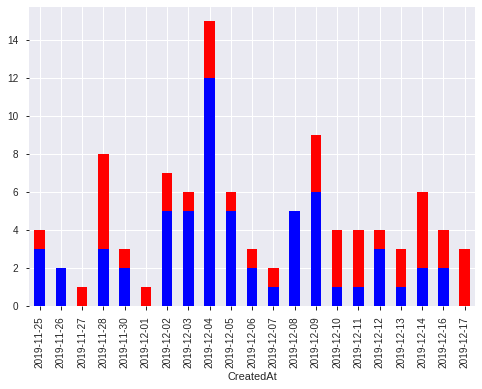

In [9]:
gprdf = prdf.groupby([prdf['CreatedAt'].dt.to_period('D')]).count().unstack()
gprdf['CreatedAt'].plot(kind='bar', color='red')
gprdf['ClosedAt'].plot(kind='bar', color='blue')